In [ ]:
from linkedlist import List
import pylab as plt
import numpy as np
from scipy.optimize import curve_fit
from time import perf_counter

# Simple Linear Search algorithm
We expect $O(n)$ running time where $n$ is the length of the array or list.

In [22]:
def LinearSearch(array_like, target):
    for item in array_like:
        if item is target:
            return True
    return False

# Binary Search
We expect $O(\log(n))$ running time when using an array and $O(n\,\log(n))$ when using a linked list.

In [148]:
def BinarySearchRec(array_like, target):
    N = len(array_like)
    if N == 1:
        return target == array_like[0]
    elif target < array_like[N // 2]:
        return BinarySearch(array_like[:N // 2], target)
    else:
        return BinarySearch(array_like[N // 2:], target)

It might be preferable to use a non-recursive binary search as the recursive one actually builds new sub-arrays in the recursion steps. The following simply resets indices.

In [132]:
def BinarySearch(array_like, target):
    hi = len(array_like)
    low = 0
    while low < hi - 1: # current sub-array is array_like[lo:hi]
        if target < array_like[(low + hi) // 2]:
            hi = (low + hi) // 2
        else:
            low = (low + hi) // 2
    return target == low

# Functions to time runs
This function takes two parameter $N$, the number of items in the list, and $M$ the number of repititions for this $N$. It is good to repeat so as to smooth out some of the noise in the system. 

In [173]:
def times(f, *args, **kwargs):
    start_time = perf_counter()
    f(*args, **kwargs)
    return perf_counter() - start_time

def testLinearSearch(N, M, linked_list = False):
    results = []
    for i in range(M):
        items = np.sort(np.random.randint(0, 2**16, N))
        target = np.random.randint(0, 2**16)        
        if linked_list:
            results += [times(LinearSearch, List(items), target)]
        else:
            results += [times(LinearSearch, items, target)]
    return np.mean(results)

def testBinarySearch(N, M, linked_list = False):
    results = []
    for i in range(M):
        items = np.sort(np.random.randint(0, 2**16, N))
        target = np.random.randint(0, 2**16) 
        if linked_list:
            results += [times(BinarySearch, List(items), target)]
        else:
            results += [times(BinarySearch, items, target)]
    return np.mean(results)

# Test run time of LinearSearch
First run on arrays.

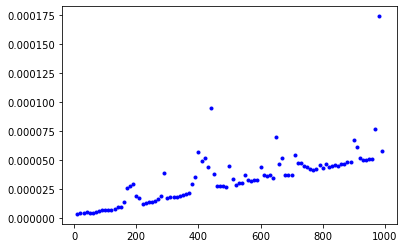

In [178]:
xdata = np.array([N for N in range(10, 1000, 10)])
ydata = np.array([testLinearSearch(N, 50) for N in range(10,1000, 10)])

fig, ax = plt.subplots()
ax.plot(xdata,ydata,"b.")
plt.show()

# A few models to fit

In [175]:
def linear(x, a, b):
    return a*x + b

def log_n(x, a, b):
    return a*np.log2(x) + b

def n_log_n(x, a, b):
    return a*x*np.log2(x) + b

# Fit a model and plot the result
We expect LinearSearch to have $O(n)$ running time. So try the `linear` fit.

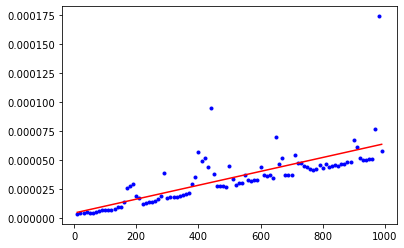

In [179]:
coeffs, cov = curve_fit(linear, xdata, ydata)
Y = [coeffs.dot(np.array([x, 1])) for x in xdata]

fig, ax = plt.subplots()
ax.plot(xdata,ydata,"b.")
ax.plot(xdata, Y, 'r-')
plt.show()

# Repeat analysis of Linear Search with linked lists
Notice, the running time has increased but the linear model is still correct.

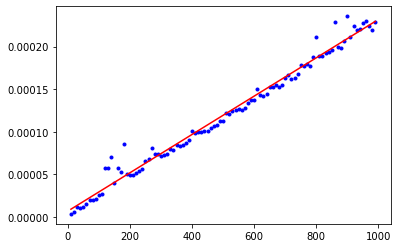

In [180]:
xdata = np.array([N for N in range(10, 1000, 10)])
ydata = np.array([testLinearSearch(N, 50, linked_list = True) for N in range(10,1000, 10)])

coeffs, cov = curve_fit(linear, xdata, ydata)
Y = [coeffs.dot(np.array([x, 1])) for x in xdata]

fig, ax = plt.subplots()
ax.plot(xdata,ydata,"b.")
ax.plot(xdata, Y, 'r-')
plt.show()

# Repeat analysis for binary search
Here we expect $O(log(n))$ running time, so try to model with `log_n` fit function.

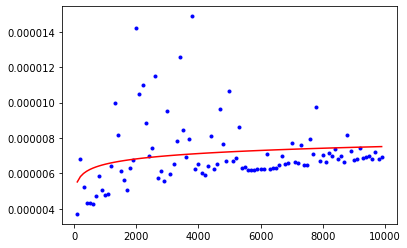

In [186]:
xdata = np.array([N for N in range(100, 10000, 100)])
ydata = np.array([testBinarySearch(N, 50) for N in range(100, 10000, 100)])

coeffs, cov = curve_fit(log_n, xdata, ydata)
Y = [coeffs.dot(np.array([np.log2(x), 1])) for x in xdata]

fig, ax = plt.subplots()
ax.plot(xdata,ydata,"b.")
ax.plot(xdata, Y, 'r-')
plt.show()

# Analysis of binary search using linked lists
Here our analysis suggests $O(n\,\log(n))$.

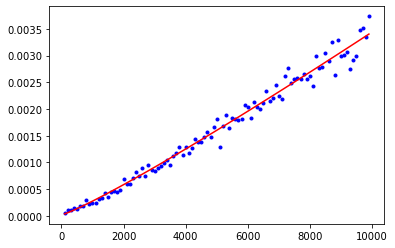

In [185]:
xdata = np.array([N for N in range(100, 10000, 100)])
ydata = np.array([testBinarySearch(N, 50, linked_list = True) for N in range(100, 10000, 100)])

coeffs, cov = curve_fit(n_log_n, xdata, ydata)
Y = [coeffs.dot(np.array([x*np.log2(x), 1])) for x in xdata]

fig, ax = plt.subplots()
ax.plot(xdata,ydata,"b.")
ax.plot(xdata, Y, 'r-')
plt.show()